In [1]:
# Load needed packages 
import os # Interoperable file paths
import pathlib  # Work with file and directory paths
import matplotlib.pyplot as plt # # Import module for plotting functionality

from glob import glob # Find files by pattern

import earthaccess # For elevation data
import geopandas as gpd # Work with geospatial data
import rioxarray.merge as rxrmerge # Import the function for merging raster datasets
import rioxarray as rxr # For combining data into a multi-dimensional arrays
import xarray as xr # Library for working with labeled muli-dimensional arrays
import xrspatial # library for geospatial analysis


c:\Users\stem2\miniconda3\envs\earth-analytics-python\Lib\site-packages\dask\dataframe\__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [2]:
# Retrieve location data
%store -r

In [3]:
# Define and create the project data directories
data_dir = os.path.join(
    pathlib.Path.home(),
    'GitHub',
    'rivercane_data'
)

os.makedirs(data_dir, exist_ok=True)

<Axes: >

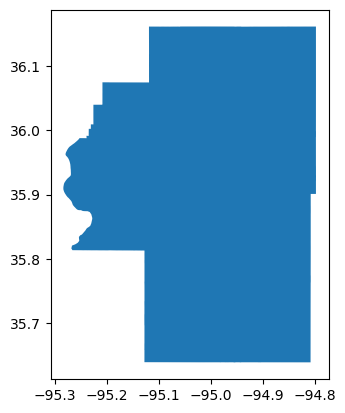

In [4]:
# Verify Oklahoma County shape
cherokee_county.plot()

In [5]:
# Use earthaccess website to access elevation data
earthaccess.login()

In [6]:
# Find the dataset that is the best fit for elevation and compatible with other 30m data 
datasets = earthaccess.search_datasets(keyword='SRTM DEM', count=11)
for dataset in datasets:
  print(dataset['umm']['ShortName'], dataset['umm']['EntryTitle'])


NASADEM_SHHP NASADEM SRTM-only Height and Height Precision Mosaic Global 1 arc second V001
NASADEM_SIM NASADEM SRTM Image Mosaic Global 1 arc second V001
NASADEM_SSP NASADEM SRTM Subswath Global 1 arc second V001
C_Pools_Fluxes_CONUS_1837 CMS: Terrestrial Carbon Stocks, Emissions, and Fluxes for Conterminous US, 2001-2016
SRTMGL1 NASA Shuttle Radar Topography Mission Global 1 arc second V003
GEDI01_B GEDI L1B Geolocated Waveform Data Global Footprint Level V002
GEDI02_B GEDI L2B Canopy Cover and Vertical Profile Metrics Data Global Footprint Level V002
NASADEM_HGT NASADEM Merged DEM Global 1 arc second V001
SRTMGL3 NASA Shuttle Radar Topography Mission Global 3 arc second V003
SRTMGL1_NC NASA Shuttle Radar Topography Mission Global 1 arc second NetCDF V003
SRTMGL30 NASA Shuttle Radar Topography Mission Global 30 arc second V002


In [7]:
# Download the elevation data for Oklahoma county
ok_srtm_pattern = os.path.join(data_dir, '*.hgt.zip')
bounds = tuple(cherokee_county.total_bounds)
if not glob(ok_srtm_pattern):
    ok_srtm_results = earthaccess.search_data(
        short_name="SRTMGL1", 
        bounding_box=bounds
    )
    ok_srtm_results = earthaccess.download(ok_srtm_results, data_dir)

In [8]:
# Extract Oklahoma data and combine into one datafile
ok_srtm_da_list = []
for ok_srtm_path in glob(ok_srtm_pattern):
    ok_tile_da = rxr.open_rasterio(ok_srtm_path, mask_and_scale=True).squeeze()
    ok_cropped_da = ok_tile_da.rio.clip_box(*bounds)
    ok_srtm_da_list.append(ok_cropped_da)

ok_srtm_da = rxrmerge.merge_arrays(ok_srtm_da_list)
ok_srtm_da

<xarray.DataArray (y: 1886, x: 1750)> Size: 13MB
array([[183., 184., 185., ..., 342., 340., 338.],
       [183., 184., 185., ..., 345., 342., 340.],
       [184., 185., 185., ..., 345., 343., 340.],
       ...,
       [207., 207., 208., ..., 251., 254., 256.],
       [206., 207., 208., ..., 251., 255., 258.],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan]], dtype=float32)
Coordinates:
  * x            (x) float64 14kB -95.28 -95.28 -95.28 ... -94.8 -94.8 -94.8
  * y            (y) float64 15kB 36.16 36.16 36.16 36.16 ... 35.64 35.64 35.64
    band         int64 8B 1
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Point
    units:          m
    _FillValue:     nan

<Axes: >

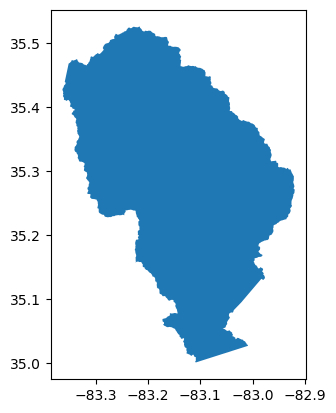

In [9]:
# Verify North Carolina county
jackson_county.plot()

In [10]:
# Define different data directory for NC
nc_data_dir = os.path.join(
    pathlib.Path.home(),
    'GitHub',
    'habitat_project'
)

os.makedirs(nc_data_dir, exist_ok=True)

In [11]:
# Download the elevation data for North Carolina county
nc_srtm_pattern = os.path.join(nc_data_dir, '*.hgt.zip')
bounds = tuple(jackson_county.total_bounds)
if not glob(nc_srtm_pattern):
    nc_srtm_results = earthaccess.search_data(
    short_name="SRTMGL1", 
    bounding_box=bounds
    )
    nc_srtm_results = earthaccess.download(nc_srtm_results, nc_data_dir)

In [12]:
# Extract North Carolina data and combine into one datafile
nc_srtm_da_list = []
for nc_srtm_path in glob(nc_srtm_pattern):
    nc_tile_da = rxr.open_rasterio(nc_srtm_path, mask_and_scale=True).squeeze()
    nc_cropped_da = nc_tile_da.rio.clip_box(*bounds)
    nc_srtm_da_list.append(nc_cropped_da)

nc_srtm_da = rxrmerge.merge_arrays(nc_srtm_da_list)
nc_srtm_da

<xarray.DataArray (y: 1891, x: 1602)> Size: 12MB
array([[1353., 1336., 1324., ...,  804.,  797.,  792.],
       [1360., 1345., 1330., ...,  802.,  798.,  793.],
       [1363., 1351., 1332., ...,  800.,  795.,  791.],
       ...,
       [ 860.,  863.,  865., ...,  342.,  342.,  342.],
       [ 853.,  857.,  862., ...,  342.,  342.,  342.],
       [  nan,   nan,   nan, ...,   nan,   nan,   nan]], dtype=float32)
Coordinates:
  * x            (x) float64 13kB -83.36 -83.36 -83.36 ... -82.92 -82.92 -82.92
  * y            (y) float64 15kB 35.53 35.53 35.53 35.53 ... 35.0 35.0 35.0
    band         int64 8B 1
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Point
    units:          m
    _FillValue:     nan

In [13]:
%store nc_srtm_da
%store ok_srtm_da

Stored 'nc_srtm_da' (DataArray)
Stored 'ok_srtm_da' (DataArray)
